                             TripID  StartDate StartTime     EndDate EndTime  \
0  0000045c-2677-3a7d-4b73-cad99a57 2019-06-26     19:30   6/26/2019   19:30   
1  0000487b-92e6-50d6-7569-42ed3818 2019-09-22     14:30   9/22/2019   14:30   
2  00006088-2579-e0d0-6a30-a15bb878 2019-08-21     17:30   8/21/2019   17:30   
3  00008c1a-899b-8596-970f-9f6bf495 2019-07-03     11:00    7/3/2019   11:15   
4  00009301-3225-2aea-a84a-165a480a 2019-11-22     10:45  11/22/2019   11:00   

   TripDuration  TripDistance  StartLatitude  StartLongitude  EndLatitude  \
0             3         0.000         38.253         -85.756       38.253   
1             5         0.000         38.203         -85.752       38.204   
2             6         0.330         38.259         -85.733       38.265   
3             6         0.640         38.217         -85.757       38.221   
4             7         0.599         38.215         -85.759       38.222   

   EndLongitude  DayOfWeek  HourNum  
0       -85.755   

Empty DataFrame
Columns: [TripID, StartDate, EndDate, TripDuration, TripDistance, StartLatitude, StartLongitude, EndLatitude, EndLongitude, DayOfWeek, HourNum]
Index: []
[7, 10, 17, 24, 36, 47, 62, 65, 69, 74, 81, 86, 88, 102, 112, 119, 120, 126, 127, 128, 135, 138, 152, 154, 155, 158, 160, 161, 162, 163, 167, 168, 169, 177, 179, 180, 192, 197, 201, 202, 216, 217, 225, 240, 266, 271, 282, 283, 291, 293, 318, 319, 329, 340, 349, 371, 372, 377, 392, 416, 431, 445, 446, 458, 475, 481, 485, 497]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 637867 entries, 0 to 637866
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TripID          637867 non-null  object 
 1   StartDate       637867 non-null  object 
 2   TripDuration    637867 non-null  int64  
 3   TripDistance    637867 non-null  float64
 4   StartLatitude   637867 non-null  float64
 5   StartLongitude  637867 non-null  float64
 6   EndLatitude     637

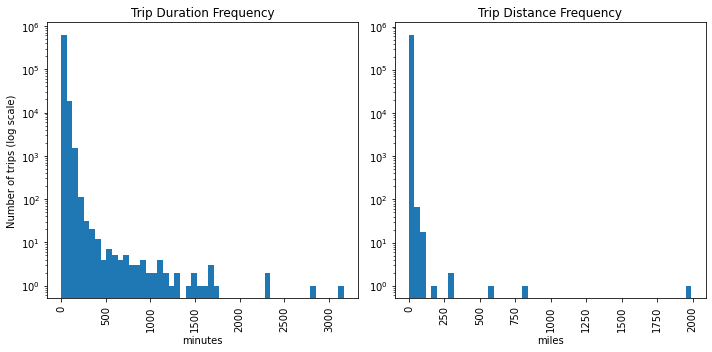

Negative duration dropped: 0
Over 12.0 hours dropped: 38
Negative or 0 distance dropped: 85085
Distance > 25 mi dropped: 130
After removing outliers:


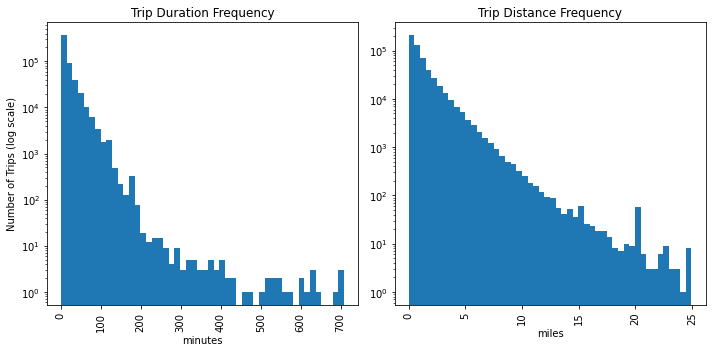

Total entries remaining: 544327
Percent removed: 15.111255972951728%
Column Data types:
TripID             object
StartDate          object
TripDuration        int64
TripDistance      float64
StartLatitude     float64
StartLongitude    float64
EndLatitude       float64
EndLongitude      float64
DayOfWeek           int64
HourNum             int64
Precip.(inch)     float64
Snow(inch)        float64
AvgTemp           float64
dtype: object


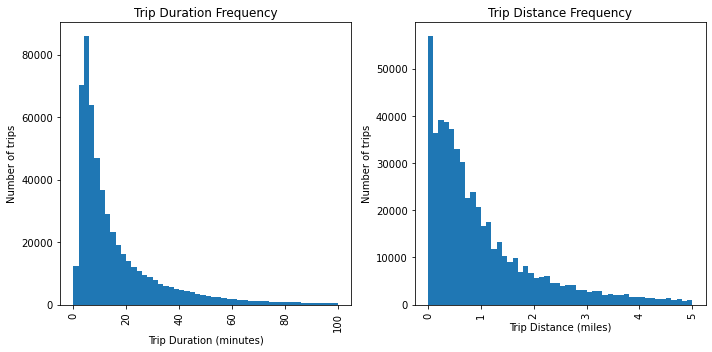

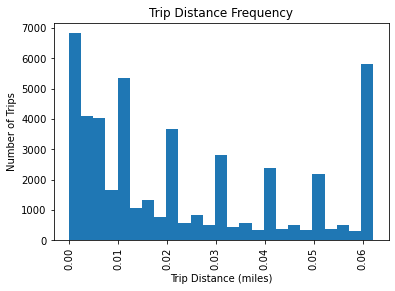

Number of Coordinate Starts: 10898
Number of Coordinate Ends: 12267
Number of unique Coordinates in the data: 14370


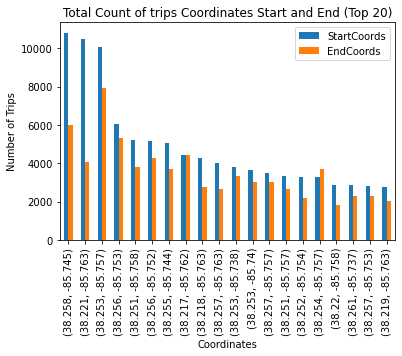

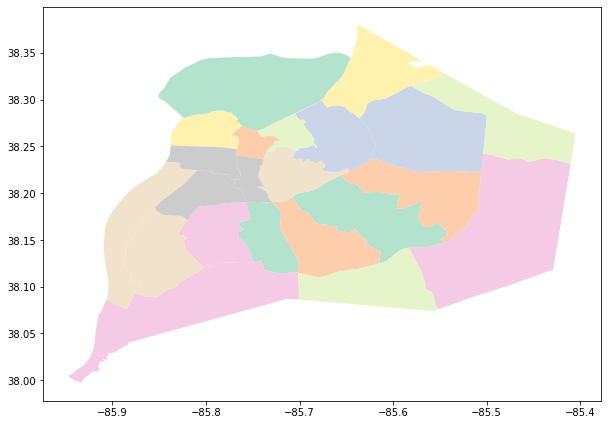

Start CRS is EPSG:4326 its geometry is `geometry`.
End CRS is EPSG:4326, its geometry is `geometry`.
Shapefile CRS is EPSG:4326.


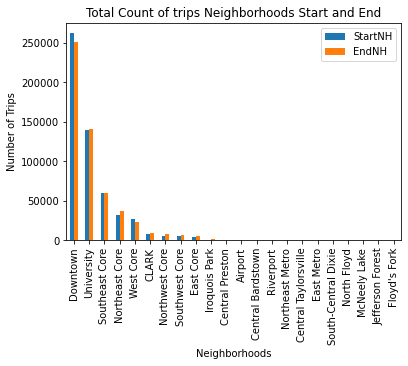

(544171, 6) (544108, 5) (544099, 11)


C:\Users\abhir\Anaconda3\lib\site-packages\geopandas\plotting.py:933: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.draw()
C:\Users\abhir\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


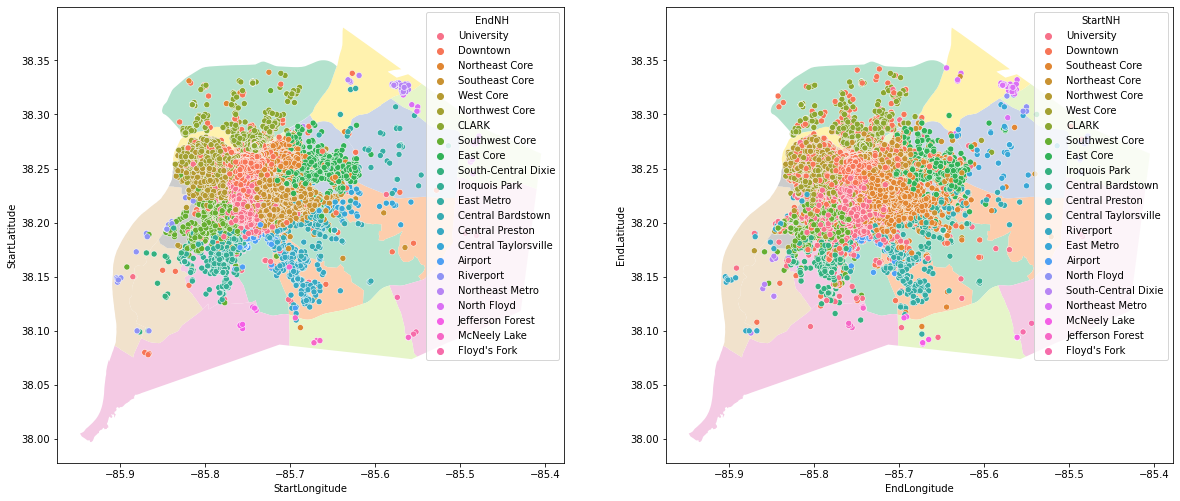

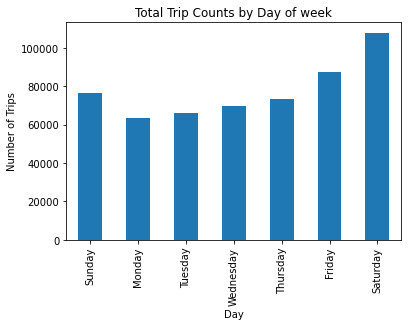

Downtown          261909
University        139424
Southeast Core     59245
Northeast Core     32203
Name: StartNH, dtype: int64
Downtown          250784
University        140377
Southeast Core     59227
Northeast Core     36630
Name: EndNH, dtype: int64
Top 4 starting location counts by day:


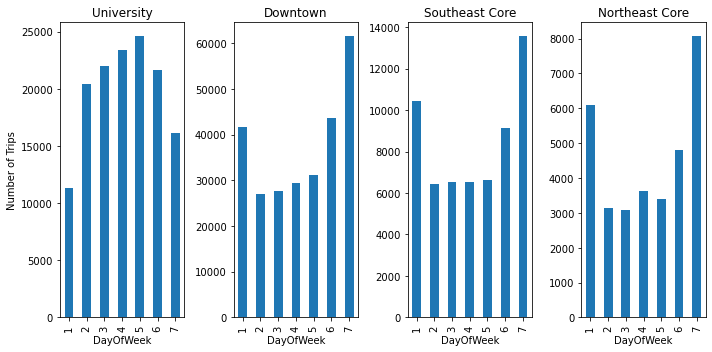

Top 4 ending location counts by day:


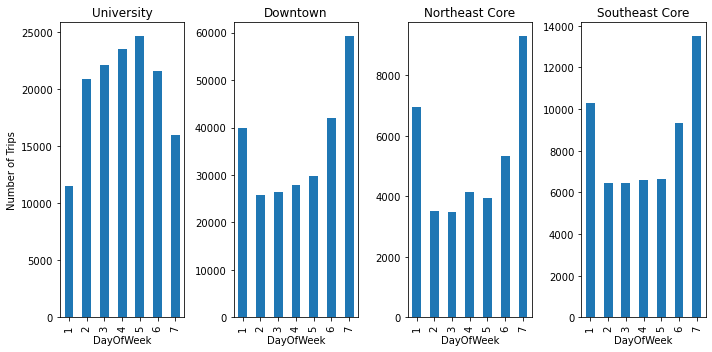

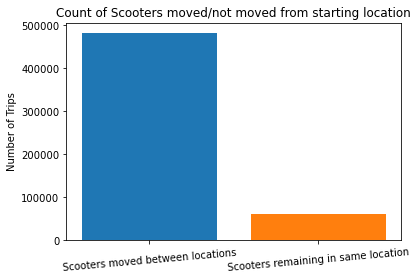

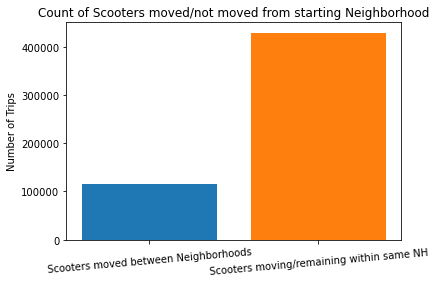

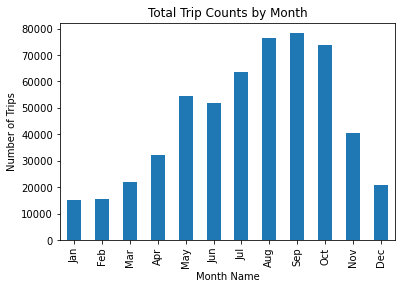

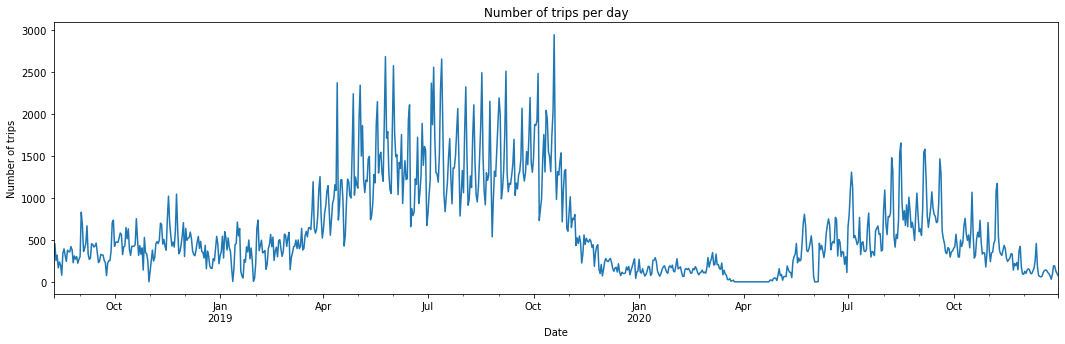

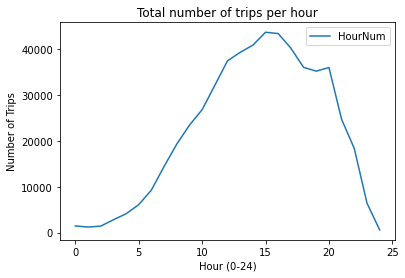

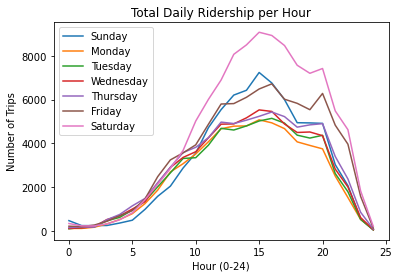

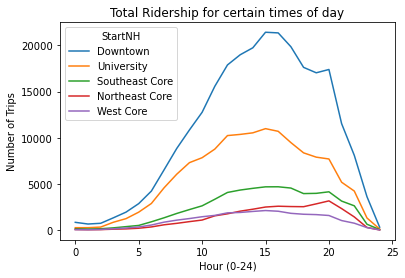

In [1]:
%run ./DataWrangling_&_EDA.ipynb

# Time Series Analysis and Forecasting using FBProphet model

## Preparing data for Forecasting

The function below was created to generate the number of rides in a neighborhood per hour. Then the date columns can be used as features, and the number of rides as target.

## Feature Engineering

In [2]:
# Import the necessary libraries
import pandas as pd
from fbprophet import Prophet

In [3]:
df123.head()

,TripID,StartDate,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum,Precip.(inch),Snow(inch),AvgTemp,StartCoords,EndCoords
0,00312fae-c855-eddf-c8e0-98655355,2019-06-26,4,0.240,38.215,-85.758,38.215,-85.751,4,14,0.0,0.0,80.05,"(38.215, -85.758)","(38.215, -85.751)"
1,00363782-6876-6801-74c9-aa310713,2019-06-26,21,0.880,38.257,-85.763,38.256,-85.746,4,13,0.0,0.0,80.05,"(38.257, -85.763)","(38.256, -85.746)"
2,00530ce5-ce5b-660c-807f-dc01f27d,2019-06-26,3,0.500,38.262,-85.744,38.258,-85.742,4,15,0.0,0.0,80.05,"(38.262, -85.744)","(38.258, -85.742)"
3,005a612f-8216-ecb1-cdf9-fda3f8fd,2019-06-26,21,0.736,38.253,-85.751,38.249,-85.757,4,13,0.0,0.0,80.05,"(38.253, -85.751)","(38.249, -85.757)"
4,0095552f-3567-c170-35b3-f04554c8,2019-06-26,3,0.080,38.257,-85.748,38.257,-85.746,4,16,0.0,0.0,80.05,"(38.257, -85.748)","(38.257, -85.746)"


In [4]:
df_rpd = pd.DataFrame(df123["StartDate"].value_counts()).sort_index()
df_rpd.columns = ['RidesPerDay']
df_rpd

,RidesPerDay
2018-08-09,293
2018-08-10,455
2018-08-11,254
2018-08-12,319
2018-08-13,166
...,...
2020-12-27,190
2020-12-28,190
2020-12-29,130
2020-12-30,101


In [5]:
import numpy as np

#create a row for every date
df_prep = pd.pivot_table(df123, index=["StartDate"], values=["TripDuration", "TripDistance", "AvgTemp", "DayOfWeek", "HourNum", "Precip.(inch)", "Snow(inch)"], aggfunc=[np.mean])
df_prep.head()

mean                                                             \
           AvgTemp DayOfWeek    HourNum Precip.(inch) Snow(inch) TripDistance   
StartDate                                                                       
2018-08-09   80.95       5.0  15.290102           0.0        0.0     1.753174   
2018-08-10   78.55       6.0  14.586813           0.0        0.0     1.611099   
2018-08-11   80.10       7.0  13.783465           0.0        0.0     2.421811   
2018-08-12   80.10       1.0  14.420063           0.0        0.0     2.440752   
2018-08-13   79.10       2.0  15.060241           0.0        0.0     2.366988   

                         
           TripDuration  
StartDate                
2018-08-09    18.617747  
2018-08-10    16.578022  
2018-08-11    26.098425  
2018-08-12    25.523511  
2018-08-13    21.704819

In [6]:
#Add the number of rides per day information as a new column in df_prep by merging df_rpd on date.
df_prep = df_prep.merge(df_rpd, how='outer', left_index=True, right_index=True)
#df_prep = df_prep.join(df_rpd)
df_prep.head()

C:\Users\abhir\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,"(mean, AvgTemp)","(mean, DayOfWeek)","(mean, HourNum)","(mean, Precip.(inch))","(mean, Snow(inch))","(mean, TripDistance)","(mean, TripDuration)",RidesPerDay
StartDate,,,,,,,,
2018-08-09,80.95,5.0,15.290102,0.0,0.0,1.753174,18.617747,293
2018-08-10,78.55,6.0,14.586813,0.0,0.0,1.611099,16.578022,455
2018-08-11,80.10,7.0,13.783465,0.0,0.0,2.421811,26.098425,254
2018-08-12,80.10,1.0,14.420063,0.0,0.0,2.440752,25.523511,319
2018-08-13,79.10,2.0,15.060241,0.0,0.0,2.366988,21.704819,166


In [7]:
df_prep.columns = ['AvgTemp','DayOfWeek','HourNum','Precip.(inch)','Snow(inch)','TripDistance','TripDuration','RidesPerDay']
df_prep.head()

,AvgTemp,DayOfWeek,HourNum,Precip.(inch),Snow(inch),TripDistance,TripDuration,RidesPerDay
StartDate,,,,,,,,
2018-08-09,80.95,5.0,15.290102,0.0,0.0,1.753174,18.617747,293
2018-08-10,78.55,6.0,14.586813,0.0,0.0,1.611099,16.578022,455
2018-08-11,80.10,7.0,13.783465,0.0,0.0,2.421811,26.098425,254
2018-08-12,80.10,1.0,14.420063,0.0,0.0,2.440752,25.523511,319
2018-08-13,79.10,2.0,15.060241,0.0,0.0,2.366988,21.704819,166


In [8]:
df_prep['Date'] = df_prep.index.values
df_prep['Date'] = pd.to_datetime(df_prep['Date'], format='%Y/%m/%d')
df_prep['DayOfWeek'] = df_prep['Date'].dt.dayofweek
df_prep.head()

,AvgTemp,DayOfWeek,HourNum,Precip.(inch),Snow(inch),TripDistance,TripDuration,RidesPerDay,Date
StartDate,,,,,,,,,
2018-08-09,80.95,3,15.290102,0.0,0.0,1.753174,18.617747,293,2018-08-09
2018-08-10,78.55,4,14.586813,0.0,0.0,1.611099,16.578022,455,2018-08-10
2018-08-11,80.10,5,13.783465,0.0,0.0,2.421811,26.098425,254,2018-08-11
2018-08-12,80.10,6,14.420063,0.0,0.0,2.440752,25.523511,319,2018-08-12
2018-08-13,79.10,0,15.060241,0.0,0.0,2.366988,21.704819,166,2018-08-13


In the above dataframe 'df_prep', the DayOfWeek column has numbers 0-6 representing 0 - Monday, 1 - Tuesday, 2 - Wednesday, 3 - Thursday, 4 - Friday, 5 - Saturday and 6 - Sunday.

Now, I will add Number Of Rides Per Day occurred in each Neighborhood information to the above dataframe

In [9]:
gdf.head()

,TripID,TripDuration,TripDistance,DayOfWeek,StartDate,StartLatitude,StartLongitude,StartNH,EndLatitude,EndLongitude,EndNH,HourNum
0,00312fae-c855-eddf-c8e0-98655355,4,0.240,4,2019-06-26,38.215,-85.758,University,38.215,-85.751,University,14
1,00363782-6876-6801-74c9-aa310713,21,0.880,4,2019-06-26,38.257,-85.763,Downtown,38.256,-85.746,Downtown,13
2,00530ce5-ce5b-660c-807f-dc01f27d,3,0.500,4,2019-06-26,38.262,-85.744,Downtown,38.258,-85.742,Downtown,15
3,005a612f-8216-ecb1-cdf9-fda3f8fd,21,0.736,4,2019-06-26,38.253,-85.751,Downtown,38.249,-85.757,Downtown,13
4,0095552f-3567-c170-35b3-f04554c8,3,0.080,4,2019-06-26,38.257,-85.748,Downtown,38.257,-85.746,Downtown,16


In [10]:
#Create a DataFrame which contains data about No. of Rides started from a location on a specific date.

df_nh_rpd = pd.DataFrame(gdf.groupby(['StartDate', 'StartNH']).size())
df_nh_rpd.columns = ['NHRCounts']
df_nh_rpd.head()

NHRCounts
StartDate  StartNH                  
2018-08-09 CLARK                   1
           Downtown              218
           Northeast Core         12
           Northwest Core          3
           Southeast Core         57

In [11]:
df_nh_rpd = df_nh_rpd.reset_index(level=['StartNH']) #unindexing 'StartNH' column

In [12]:
df_nh_rpd = df_nh_rpd.pivot(columns='StartNH', values='NHRCounts').fillna(0) #Replaced all NaN values with zeroes.
df_nh_rpd = df_nh_rpd.astype(int) #Convert all vlaues in the dataframe into 'int' data type. Previously they were float64.
df_nh_rpd = df_nh_rpd.add_prefix('s_') #Add prefix tot he column names
df_nh_rpd.head()


StartNH,s_Airport,s_CLARK,s_Central Bardstown,s_Central Preston,s_Central Taylorsville,s_Downtown,s_East Core,s_East Metro,s_Floyd's Fork,s_Iroquois Park,...,s_North Floyd,s_Northeast Core,s_Northeast Metro,s_Northwest Core,s_Riverport,s_South-Central Dixie,s_Southeast Core,s_Southwest Core,s_University,s_West Core
StartDate,,,,,,,,,,,,,,,,,,,,,
2018-08-09,0,1,0,0,0,218,0,0,0,0,...,0,12,0,3,0,0,57,0,2,0
2018-08-10,0,1,0,0,0,385,1,0,0,0,...,0,10,0,7,0,0,50,0,1,0
2018-08-11,0,4,0,0,0,171,0,0,0,0,...,0,15,3,1,0,0,58,0,1,0
2018-08-12,0,3,0,0,0,217,9,0,0,0,...,0,20,0,6,0,0,64,0,0,0
2018-08-13,0,6,0,0,0,87,1,0,0,0,...,0,4,0,4,0,0,61,0,3,0


In [13]:
#Create a DataFrame which contains data about No. of Rides ended at a location on a specific date.
df_endnh_rpd = pd.DataFrame(gdf.groupby(['StartDate', 'EndNH']).size())
df_endnh_rpd.columns = ['NHRCounts']
df_endnh_rpd = df_endnh_rpd.reset_index(level=['EndNH'])
df_endnh_rpd = df_endnh_rpd.pivot(columns='EndNH', values='NHRCounts').fillna(0)
df_endnh_rpd = df_endnh_rpd.astype(int)
df_endnh_rpd = df_endnh_rpd.add_prefix('e_') #Add prefix tot he column names
df_endnh_rpd.head()

EndNH,e_Airport,e_CLARK,e_Central Bardstown,e_Central Preston,e_Central Taylorsville,e_Downtown,e_East Core,e_East Metro,e_Floyd's Fork,e_Iroquois Park,...,e_North Floyd,e_Northeast Core,e_Northeast Metro,e_Northwest Core,e_Riverport,e_South-Central Dixie,e_Southeast Core,e_Southwest Core,e_University,e_West Core
StartDate,,,,,,,,,,,,,,,,,,,,,
2018-08-09,0,0,0,0,0,199,0,0,0,0,...,0,23,0,7,0,0,62,0,2,0
2018-08-10,0,3,0,0,0,373,3,0,0,0,...,0,14,0,7,0,0,51,0,3,1
2018-08-11,0,4,0,0,0,170,0,0,0,0,...,0,20,3,0,0,0,54,1,1,0
2018-08-12,0,4,0,0,0,215,12,0,0,0,...,0,22,0,7,0,0,59,0,0,0
2018-08-13,0,8,0,0,0,81,1,0,0,0,...,0,6,0,4,0,0,62,0,4,0


In [14]:
#Merge the above two dataframes with the new features.
df = df_prep.merge(df_nh_rpd,on='StartDate').merge(df_endnh_rpd,on='StartDate')

In [15]:
df = df.reset_index(level=['StartDate']) #unindexing StartDate column
df.drop(columns = ['Date'], inplace=True) #dropping the extra Date column as we already have StartDate column having the exact same data.
df.head()


,StartDate,AvgTemp,DayOfWeek,HourNum,Precip.(inch),Snow(inch),TripDistance,TripDuration,RidesPerDay,s_Airport,...,e_North Floyd,e_Northeast Core,e_Northeast Metro,e_Northwest Core,e_Riverport,e_South-Central Dixie,e_Southeast Core,e_Southwest Core,e_University,e_West Core
0,2018-08-09,80.95,3,15.290102,0.0,0.0,1.753174,18.617747,293,0,...,0,23,0,7,0,0,62,0,2,0
1,2018-08-10,78.55,4,14.586813,0.0,0.0,1.611099,16.578022,455,0,...,0,14,0,7,0,0,51,0,3,1
2,2018-08-11,80.10,5,13.783465,0.0,0.0,2.421811,26.098425,254,0,...,0,20,3,0,0,0,54,1,1,0
3,2018-08-12,80.10,6,14.420063,0.0,0.0,2.440752,25.523511,319,0,...,0,22,0,7,0,0,59,0,0,0
4,2018-08-13,79.10,0,15.060241,0.0,0.0,2.366988,21.704819,166,0,...,0,6,0,4,0,0,62,0,4,0


In [16]:
df.drop(columns=['HourNum', 'e_Airport', 'e_CLARK', 'e_Central Bardstown', 'e_Central Preston', 'e_Central Taylorsville',
                 'e_Downtown', 'e_East Core', 'e_East Metro', "e_Floyd's Fork",
       'e_Iroquois Park', 'e_Jefferson Forest', 'e_McNeely Lake',
       'e_North Floyd', 'e_Northeast Core', 'e_Northeast Metro',
       'e_Northwest Core', 'e_Riverport', 'e_South-Central Dixie',
       'e_Southeast Core', 'e_Southwest Core', 'e_University', 'e_West Core'], inplace=True)


In [17]:
df.columns

Index(['StartDate', 'AvgTemp', 'DayOfWeek', 'Precip.(inch)', 'Snow(inch)',
       'TripDistance', 'TripDuration', 'RidesPerDay', 's_Airport', 's_CLARK',
       's_Central Bardstown', 's_Central Preston', 's_Central Taylorsville',
       's_Downtown', 's_East Core', 's_East Metro', 's_Floyd's Fork',
       's_Iroquois Park', 's_Jefferson Forest', 's_McNeely Lake',
       's_North Floyd', 's_Northeast Core', 's_Northeast Metro',
       's_Northwest Core', 's_Riverport', 's_South-Central Dixie',
       's_Southeast Core', 's_Southwest Core', 's_University', 's_West Core'],
      dtype='object')

Thus, Feauture Engineering is complete and we have the following columns available to implement Machine Learning for predicting Rides in future.

AvgTemp - Average Temperature on a particular day


**DayOfWeek** - Day of week 0-6 resembling Monday-Sunday <br>
**Precp.(inch)** - Avg Precipitation on a particular day <br>
**Snow(inch)** - Average Snowfall on a particular day <br>
**TripDistance** - Average distance travelled by each scooter on a single day <br>
**TripDuration** - Average duration taken by the rider to get to his/her destination on a particular day. <br>
**RidesPerDay** - Total number of rides that took place in a day. <br>
**s_Airport** - number of rides started from Airport Neighborhood in a day <br>

Columns 's_Airport', 's_CLARK', 's_Central Bardstown', 's_Central Preston', 's_Central Taylorsville', 's_Downtown', 's_East Core', 's_East Metro', 's_Floyd's Fork', 's_Iroquois Park', 's_Jefferson Forest', 's_McNeely Lake', 's_North Floyd', 's_Northeast Core', 's_Northeast Metro', 's_Northwest Core', 's_Riverport', 's_South-Central Dixie', 's_Southeast Core', 's_Southwest Core', 's_University', 's_West Core' - indicate the number of rides started from a particular Neighborhood on a certain date.

In [18]:
df.head()

,StartDate,AvgTemp,DayOfWeek,Precip.(inch),Snow(inch),TripDistance,TripDuration,RidesPerDay,s_Airport,s_CLARK,...,s_North Floyd,s_Northeast Core,s_Northeast Metro,s_Northwest Core,s_Riverport,s_South-Central Dixie,s_Southeast Core,s_Southwest Core,s_University,s_West Core
0,2018-08-09,80.95,3,0.0,0.0,1.753174,18.617747,293,0,1,...,0,12,0,3,0,0,57,0,2,0
1,2018-08-10,78.55,4,0.0,0.0,1.611099,16.578022,455,0,1,...,0,10,0,7,0,0,50,0,1,0
2,2018-08-11,80.10,5,0.0,0.0,2.421811,26.098425,254,0,4,...,0,15,3,1,0,0,58,0,1,0
3,2018-08-12,80.10,6,0.0,0.0,2.440752,25.523511,319,0,3,...,0,20,0,6,0,0,64,0,0,0
4,2018-08-13,79.10,0,0.0,0.0,2.366988,21.704819,166,0,6,...,0,4,0,4,0,0,61,0,3,0


In [19]:
len(df)

841

### Prepare dataframes to forecast number of rides in City of Louisville's top 5 select neigborhoods

Top 5 neighborhoods include:
1. Downtown
2. University
3. Southeast Core
4. Northeast Core
5. West Core

In [20]:
downtown_df = df.drop(columns=['s_Airport', 's_CLARK', 's_Central Bardstown', 's_Central Preston', 's_Central Taylorsville', 's_East Core', 's_East Metro', "s_Floyd's Fork", 's_Iroquois Park', 's_Jefferson Forest', 's_McNeely Lake', 's_North Floyd', 's_Northeast Core', 's_Northeast Metro', 's_Northwest Core', 's_Riverport', 's_South-Central Dixie', 's_Southeast Core', 's_Southwest Core', 's_University', 's_West Core'])
university_df = df.drop(columns=['s_Airport', 's_CLARK', 's_Central Bardstown', 's_Central Preston', 's_Central Taylorsville', 's_Downtown', 's_East Core', 's_East Metro', "s_Floyd's Fork", 's_Iroquois Park', 's_Jefferson Forest', 's_McNeely Lake', 's_North Floyd', 's_Northeast Core', 's_Northeast Metro', 's_Northwest Core', 's_Riverport', 's_South-Central Dixie', 's_Southeast Core', 's_Southwest Core', 's_West Core'])
southeast_core_df = df.drop(columns=['s_Airport', 's_CLARK', 's_Central Bardstown', 's_Central Preston', 's_Central Taylorsville', 's_Downtown', 's_East Core', 's_East Metro', "s_Floyd's Fork", 's_Iroquois Park', 's_Jefferson Forest', 's_McNeely Lake', 's_North Floyd', 's_Northeast Core', 's_Northeast Metro', 's_Northwest Core', 's_Riverport', 's_South-Central Dixie', 's_Southwest Core', 's_University', 's_West Core'])
northeast_core_df = df.drop(columns=['s_Airport', 's_CLARK', 's_Central Bardstown', 's_Central Preston', 's_Central Taylorsville', 's_Downtown', 's_East Core', 's_East Metro', "s_Floyd's Fork", 's_Iroquois Park', 's_Jefferson Forest', 's_McNeely Lake', 's_North Floyd', 's_Northeast Metro', 's_Northwest Core', 's_Riverport', 's_South-Central Dixie', 's_Southeast Core', 's_Southwest Core', 's_University', 's_West Core'])
west_core_df = df.drop(columns=['s_Airport', 's_CLARK', 's_Central Bardstown', 's_Central Preston', 's_Central Taylorsville', 's_Downtown', 's_East Core', 's_East Metro', "s_Floyd's Fork", 's_Iroquois Park', 's_Jefferson Forest', 's_McNeely Lake', 's_North Floyd', 's_Northeast Core', 's_Northeast Metro', 's_Northwest Core', 's_Riverport', 's_South-Central Dixie', 's_Southeast Core', 's_Southwest Core', 's_University'])


In [21]:
#check if the StartDate column is a datetime object.
#import pandas as pd
from datetime import datetime

if isinstance(downtown_df['StartDate'].iloc[0], datetime):
    print("StartDate is a datetime object")
else:
    print("StartDate is not a datetime object")


StartDate is not a datetime object


In [22]:
#check if the StartDate column is a timestamp object.

if isinstance(downtown_df['StartDate'].iloc[0], pd.Timestamp):
    print("StartDate is a timestamp object")
else:
    print("StartDate is not a timestamp object")


StartDate is not a timestamp object


In [23]:
#Convert the StartDate column into a datetime object for the above dataframes representing top 5 neighborhoods.
downtown_df['StartDate'] = pd.to_datetime(downtown_df['StartDate'])
university_df['StartDate'] = pd.to_datetime(university_df['StartDate'])
southeast_core_df['StartDate'] = pd.to_datetime(southeast_core_df['StartDate'])
northeast_core_df['StartDate'] = pd.to_datetime(northeast_core_df['StartDate'])
west_core_df['StartDate'] = pd.to_datetime(west_core_df['StartDate'])

In [24]:
downtown_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StartDate      841 non-null    datetime64[ns]
 1   AvgTemp        841 non-null    float64       
 2   DayOfWeek      841 non-null    int64         
 3   Precip.(inch)  841 non-null    float64       
 4   Snow(inch)     841 non-null    float64       
 5   TripDistance   841 non-null    float64       
 6   TripDuration   841 non-null    float64       
 7   RidesPerDay    841 non-null    int64         
 8   s_Downtown     841 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2)
memory usage: 56.0 KB


In [25]:
university_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StartDate      841 non-null    datetime64[ns]
 1   AvgTemp        841 non-null    float64       
 2   DayOfWeek      841 non-null    int64         
 3   Precip.(inch)  841 non-null    float64       
 4   Snow(inch)     841 non-null    float64       
 5   TripDistance   841 non-null    float64       
 6   TripDuration   841 non-null    float64       
 7   RidesPerDay    841 non-null    int64         
 8   s_University   841 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2)
memory usage: 56.0 KB


### Forecast for select neighborhoods using FB Prophet

#### 1. Downtown

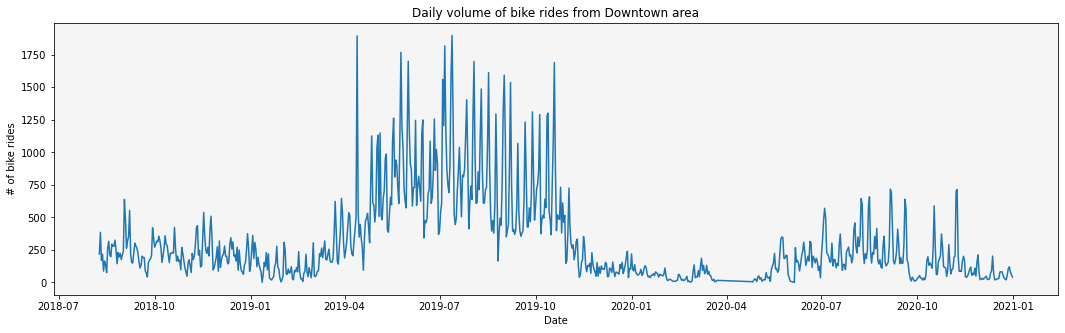

In [26]:
# plot daily ride counts for a specific neighborhood.
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(downtown_df.StartDate, 
         downtown_df.s_Downtown)
ax.set_facecolor('whitesmoke')
ax.title.set_text('Daily volume of bike rides from Downtown area')
ax.set_xlabel('Date')
ax.set_ylabel('# of bike rides');
     

In [27]:
# Import the necessary libraries
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import pandas as pd

In [28]:
# Prepare the data for Prophet
downtown_df = downtown_df.rename(columns={'StartDate': 'ds', 's_Downtown': 'y'})

When using the **fbprophet** library to forecast **time series data**, it is important to split the data into a **training set** and a **test set**. There are two common ways to split the data: by time or by percentage.

1. **Splitting the data by time:** In this method, the data is split based on a specific time period, such as years. For example, if you have data for 5 years, you can use the first 4 years for training and the last year for testing. This approach is useful when the data has a clear seasonal pattern, and you want to make sure that the test set includes a full seasonal cycle.

2. **Splitting the data by percentage:** In this method, the data is split into a fixed percentage for training and the rest for testing. For example, if you have data for 5 years, you can use 80% of the data for training and the remaining 20% for testing. This approach is useful when the data does not have a clear seasonal pattern, or when you want to test the model's ability to generalize to unseen data.

In most cases, splitting the data by percentage is the better approach because it's more likely that your model will be able to generalize to unseen data. But the best approach will depend on the specific characteristics of your dataset. If you do not have a clear seasonal pattern in your dataset, you can split the data by percentage. However, if your data has a clear seasonal pattern, you should split the data by time to make sure that the test set includes a full seasonal cycle.

It is worth noting that, when you have a large amount of data, it's not necessary to split your data into train and test sets. Instead, you can use cross-validation techniques, like Time series cross-validation or rolling forecast origin cross-validation to validate your model. These techniques will give you a better estimate of the model's performance on new data.

In our case, we have decided to split the data by percentage because we haven't observed any clear signs of seasonal patterns across the lifetime of the data in the dataset (Refer the above plot). Moreover, we can see the data is impacted by unexpected disruptions such as Covid during March and April months of year 2020. Therefore, we would like our model to be able to generalize to unseen data. Hence, we chose to split by percentage.



In [29]:
# Split the data into train and test sets
train = downtown_df.iloc[:int(0.7*(len(downtown_df)))]
test = downtown_df.iloc[int(0.7*(len(downtown_df))):]

#Logarithmic transformation of y to make time series data stationary
#train.loc[:,'y_orig'] = train['y'] #creating a copy of column 'y' and naming it 'y_orig'
#train.loc[:,'y'] = np.log(train['y'])

The **add_regressor()** method in Prophet allows you to include additional variables (also known as regressors or covariates) in your time series forecasting model. These variables can be used to model external factors that may be influencing the trend or seasonality of your time series data. For example, **if you are forecasting the number of scooter rides per day, you may want to include variables such as temperature, precipitation, or day of the week as additional regressors.** The add_regressor() method takes the name of the column in the dataset that contains the regressor variable and adds it to the model's input data.

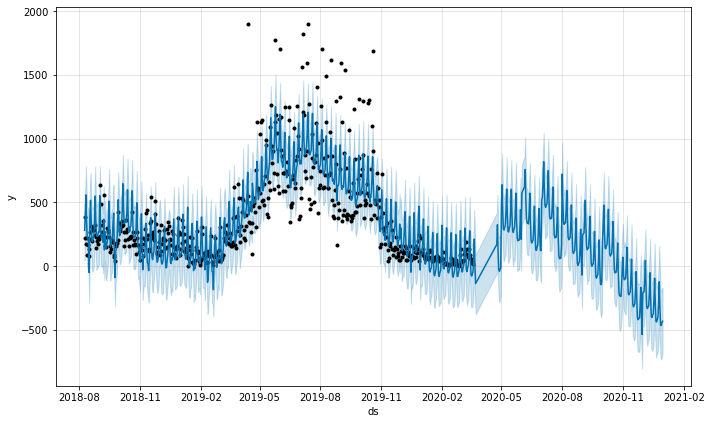

In [46]:
# Instantiate a new Prophet model
m_dwntwn = Prophet(daily_seasonality=True, yearly_seasonality=True)

#Add extra regressors to model external factors that may be influencing the trend or seasonality of the time series data.
m_dwntwn.add_regressor('AvgTemp')
m_dwntwn.add_regressor('Precip.(inch)')
m_dwntwn.add_regressor('Snow(inch)')
#m_dwntwn.add_regressor('DayOfWeek')

# Fit the model to the train data
m_dwntwn.fit(train)

# Define the number of future days to forecast
future_dwntwn = m_dwntwn.make_future_dataframe(periods=252, freq='D')

#future_dwntwn.head(5)
#After we have created a Future dataset, we will need to merge regressors data back to the Future dataset before we can create a forecast.
future_dwntwn=downtown_df[['ds', 'AvgTemp', 'Precip.(inch)', 'Snow(inch)']]
'''
(OR)
future_dwntwn.merge(downtown_df, on='ds', how='left')
(OR)
future_dwntwn = downtown.filter(['ds', 'AvgTemp', 'Precip.(inch)', 'Snow(inch)'])

Please note this is kind of cheating since you are including actual/historical regressor variables. In the real world, you will need to create separate forecasts for each regressor variable.
'''

# Make predictions
forecast_dwntwn = m_dwntwn.predict(future_dwntwn)

# Plot the forecast
m_dwntwn.plot(forecast_dwntwn)
plt.show()
#plot_plotly(m_dwntwn ,forecast_dwntwn)


In [47]:
future_dwntwn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             841 non-null    datetime64[ns]
 1   AvgTemp        841 non-null    float64       
 2   Precip.(inch)  841 non-null    float64       
 3   Snow(inch)     841 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 26.4 KB


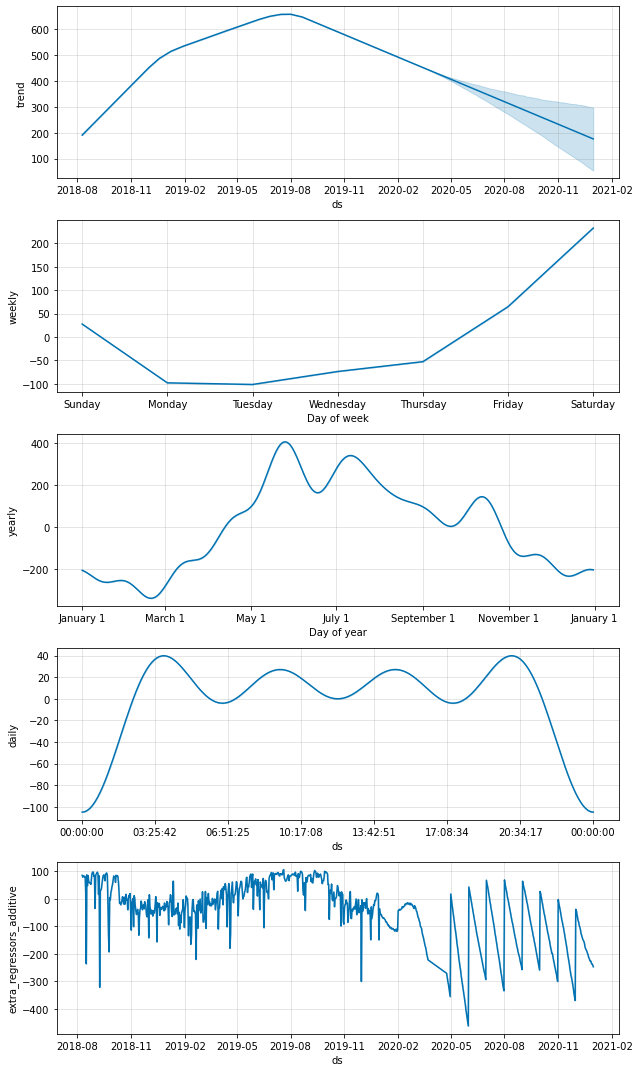

In [48]:
#plot forecast components
fig_dwntwn = m_dwntwn.plot_components(forecast_dwntwn)
#plot_components_plotly(m_dwntwn, forecast_dwntwn)

### Evaluate Model

In [49]:
from statsmodels.tools.eval_measures import rmse, meanabs
from sklearn.metrics import mean_absolute_percentage_error

In [50]:
predictions_dwntwn = forecast_dwntwn.iloc[-253:]['yhat']

In [51]:
print("Root Mean Squared Error between actual and  predicted values (RMSE): ",rmse(predictions_dwntwn,test['y']))
print("Mean Absolute Error between actual and  predicted values (MAE): ",meanabs(predictions_dwntwn,test['y']))
print("Mean Absolute Percentage Error between actual and  predicted values (MAPE): ",mean_absolute_percentage_error(test['y'], predictions_dwntwn))

print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values (RMSE):  267.6523086754939
Mean Absolute Error between actual and  predicted values (MAE):  219.49875637401126
Mean Absolute Percentage Error between actual and  predicted values (MAPE):  1.1052035563821532e+16
Mean Value of Test Dataset: 164.85375494071147


In [52]:
#Dataframe with Actual values from test set and Predicted values

dwntwn_act_pred = pd.DataFrame({'Actual': test['y'].values, 'Predicted': predictions_dwntwn})
dwntwn_act_pred.head()

,Actual,Predicted
588,25,59.266236
589,4,212.031996
590,9,-1.250021
591,16,-137.541200
592,6,168.957498


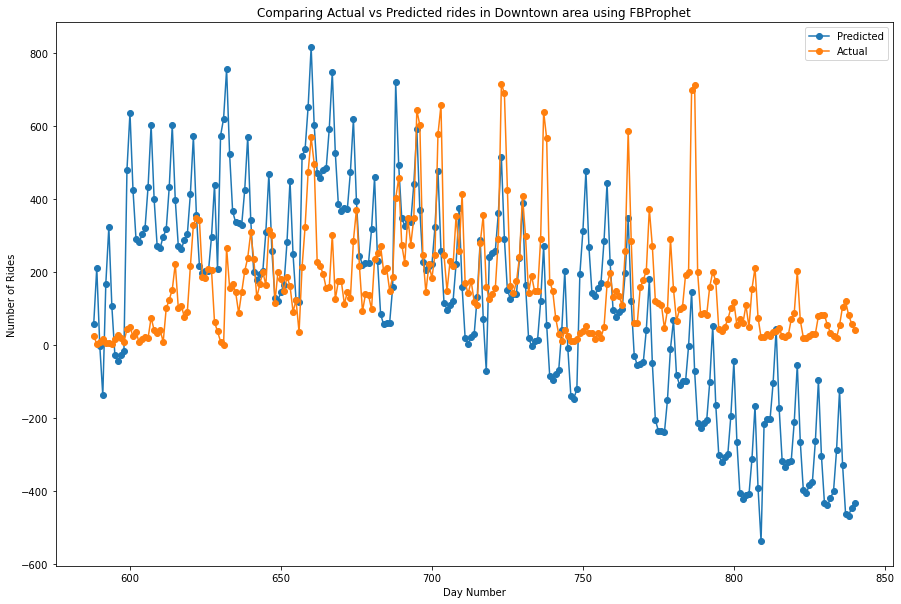

In [54]:
# plot predictions vs actual
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides in Downtown area using FBProphet')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(dwntwn_act_pred.index.values, dwntwn_act_pred['Predicted'], '-o', label='Predicted')
plt.plot(dwntwn_act_pred.index.values, dwntwn_act_pred['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

#### 2. University

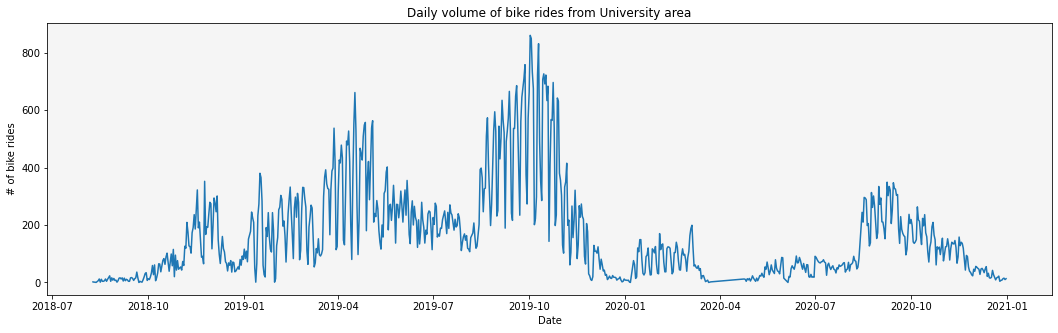

In [55]:
# plot daily ride counts for University neighborhood.
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(university_df.StartDate, 
         university_df.s_University)
ax.set_facecolor('whitesmoke')
ax.title.set_text('Daily volume of bike rides from University area')
ax.set_xlabel('Date')
ax.set_ylabel('# of bike rides');

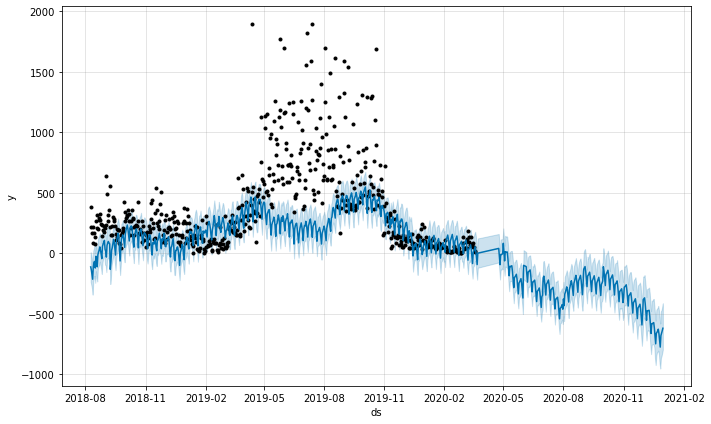

In [56]:
# Prepare the data for Prophet
university_df = university_df.rename(columns={'StartDate': 'ds', 's_University': 'y'})

# Split the data into train and test sets
train = university_df.iloc[:int(0.7*(len(university_df)))]
test = university_df.iloc[int(0.7*(len(university_df))):]

# Instantiate a new Prophet model
m_univ = Prophet(daily_seasonality=True, yearly_seasonality=True)

#Add extra regressors to model external factors that may be influencing the trend or seasonality of the time series data.
m_univ.add_regressor('AvgTemp')
m_univ.add_regressor('Precip.(inch)')
m_univ.add_regressor('Snow(inch)')

# Fit the model to the train data
m_univ.fit(train)

# Define the number of future days to forecast
future_univ = m_univ.make_future_dataframe(periods=252)

#After we have created a Future dataset, we will need to merge regressors data back to the Future dataset before we can create a forecast.
future_univ = university_df[['ds', 'AvgTemp', 'Precip.(inch)', 'Snow(inch)']]

# Make predictions
forecast_univ = m_univ.predict(future_univ)

# Plot the forecast
m_dwntwn.plot(forecast_univ)
plt.show()
#plot_plotly(m_univ ,forecast_univ)

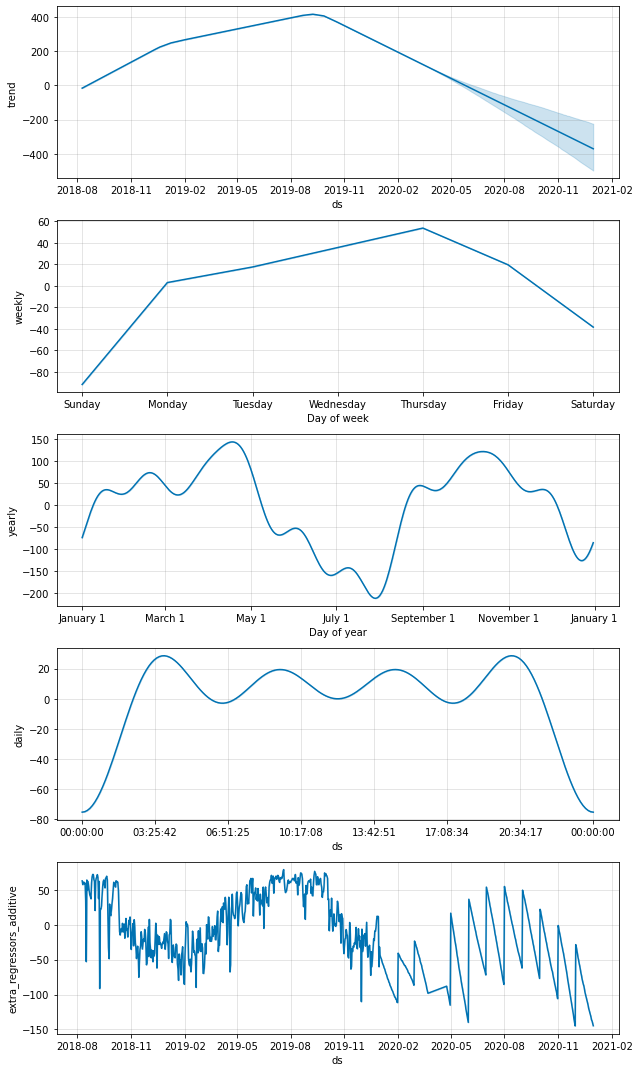

In [57]:
#plot forecast components
fig_univ = m_univ.plot_components(forecast_univ)
#plot_components_plotly(m_dwntwn, forecast_dwntwn)

#### Evaluate Model

In [58]:
predictions_univ = forecast_univ.iloc[-253:]['yhat']

print("Root Mean Squared Error between actual and  predicted values (RMSE): ",rmse(predictions_univ,test['y']))
print("Mean Absolute Error between actual and  predicted values (MAE): ",meanabs(predictions_univ,test['y']))
print("Mean Absolute Percentage Error between actual and  predicted values (MAPE): ",mean_absolute_percentage_error(test['y'], predictions_univ))

print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values (RMSE):  430.60083138917446
Mean Absolute Error between actual and  predicted values (MAE):  399.64311196676647
Mean Absolute Percentage Error between actual and  predicted values (MAPE):  2664779044542776.5
Mean Value of Test Dataset: 99.31620553359684


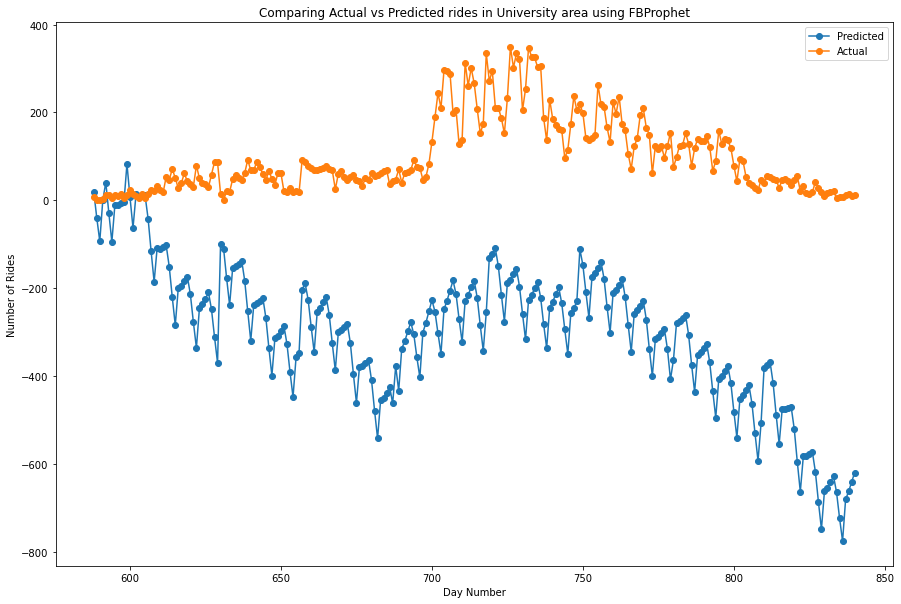

In [59]:
#Dataframe with Actual values from test set and Predicted values
univ_act_pred = pd.DataFrame({'Actual': test['y'].values, 'Predicted': predictions_univ})

# plot predictions vs actual
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides in University area using FBProphet')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(univ_act_pred.index.values, univ_act_pred['Predicted'], '-o', label='Predicted')
plt.plot(univ_act_pred.index.values, univ_act_pred['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

#### 3. Southeast Core

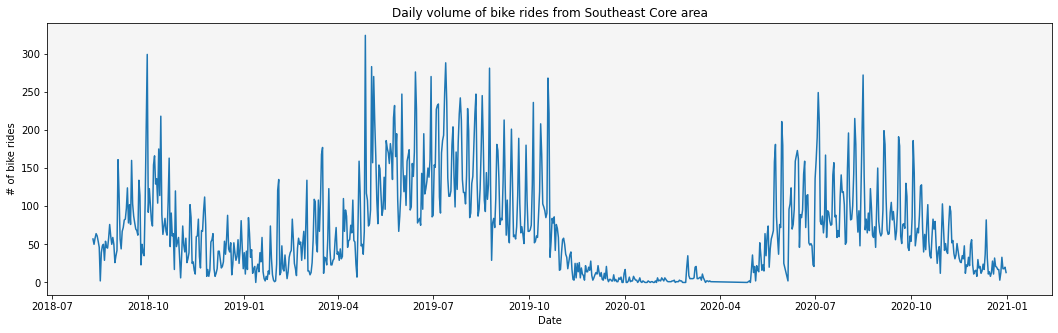

In [60]:
# plot daily ride counts for University neighborhood.
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(southeast_core_df.StartDate, 
         southeast_core_df['s_Southeast Core'])
ax.set_facecolor('whitesmoke')
ax.title.set_text('Daily volume of bike rides from Southeast Core area')
ax.set_xlabel('Date')
ax.set_ylabel('# of bike rides');

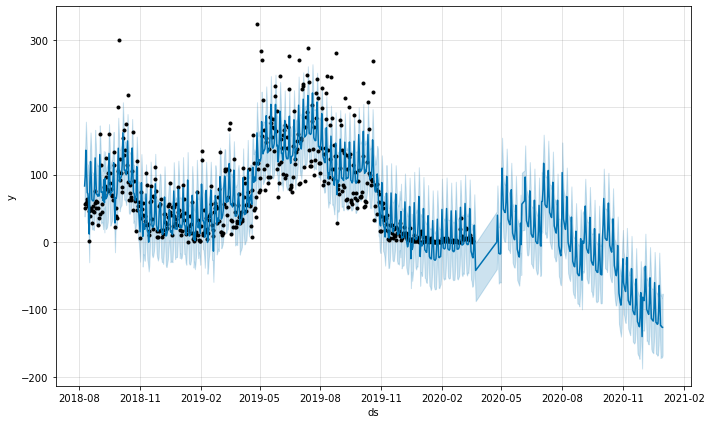

In [61]:
# Prepare the data for Prophet
southeast_core_df = southeast_core_df.rename(columns={'StartDate': 'ds', 's_Southeast Core': 'y'})

# Split the data into train and test sets
train = southeast_core_df.iloc[:int(0.7*(len(southeast_core_df)))]
test = southeast_core_df.iloc[int(0.7*(len(southeast_core_df))):]

# Instantiate a new Prophet model
m_sec = Prophet(daily_seasonality=True, yearly_seasonality=True)

#Add extra regressors to model external factors that may be influencing the trend or seasonality of the time series data.
m_sec.add_regressor('AvgTemp')
m_sec.add_regressor('Precip.(inch)')
m_sec.add_regressor('Snow(inch)')

# Fit the model to the train data
m_sec.fit(train)

# Define the number of future days to forecast
future_sec = m_sec.make_future_dataframe(periods=252)

#After we have created a Future dataset, we will need to merge regressors data back to the Future dataset before we can create a forecast.
future_sec = southeast_core_df[['ds', 'AvgTemp', 'Precip.(inch)', 'Snow(inch)']]

# Make predictions
forecast_sec = m_sec.predict(future_sec)

# Plot the forecast
m_sec.plot(forecast_sec)
plt.show()
#plot_plotly(m_sec ,forecast_sec)

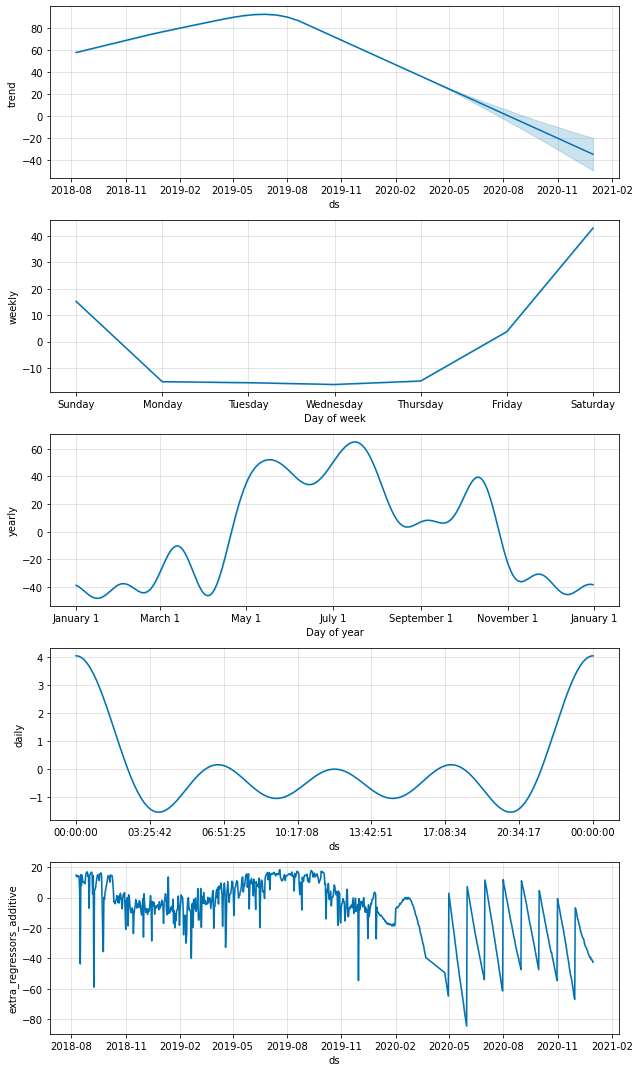

In [62]:
#plot forecast components
fig_sec = m_sec.plot_components(forecast_sec)
#plot_components_plotly(m_sec, forecast_sec)

#### Evaluate Model

In [63]:
predictions_sec = forecast_sec.iloc[-253:]['yhat']

print("Root Mean Squared Error between actual and  predicted values (RMSE): ",rmse(predictions_sec,test['y']))
print("Mean Absolute Error between actual and  predicted values (MAE): ",meanabs(predictions_sec,test['y']))
print("Mean Absolute Percentage Error between actual and  predicted values (MAPE): ",mean_absolute_percentage_error(test['y'], predictions_sec))

print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values (RMSE):  99.86683711167069
Mean Absolute Error between actual and  predicted values (MAE):  89.3474165766992
Mean Absolute Percentage Error between actual and  predicted values (MAPE):  1532873801601483.2
Mean Value of Test Dataset: 70.66798418972331


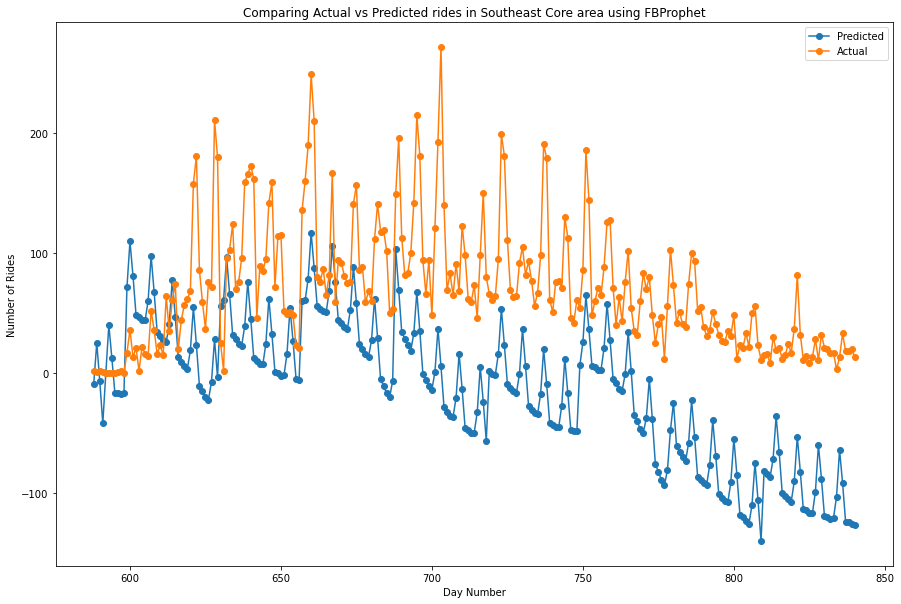

In [64]:
#Dataframe with Actual values from test set and Predicted values
sec_act_pred = pd.DataFrame({'Actual': test['y'].values, 'Predicted': predictions_sec})

# plot predictions vs actual
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides in Southeast Core area using FBProphet')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(sec_act_pred.index.values, sec_act_pred['Predicted'], '-o', label='Predicted')
plt.plot(sec_act_pred.index.values, sec_act_pred['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

#### 4. Northeast Core

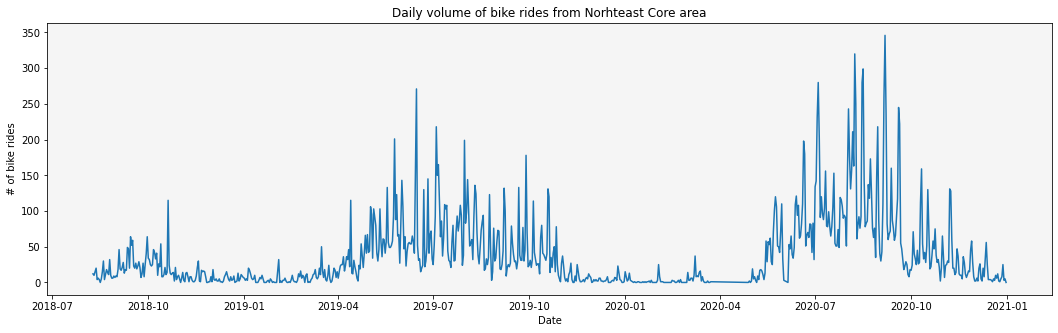

In [65]:
# plot daily ride counts for University neighborhood.
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(northeast_core_df.StartDate, 
         northeast_core_df['s_Northeast Core']) 
ax.set_facecolor('whitesmoke')
ax.title.set_text('Daily volume of bike rides from Norhteast Core area')
ax.set_xlabel('Date')
ax.set_ylabel('# of bike rides');

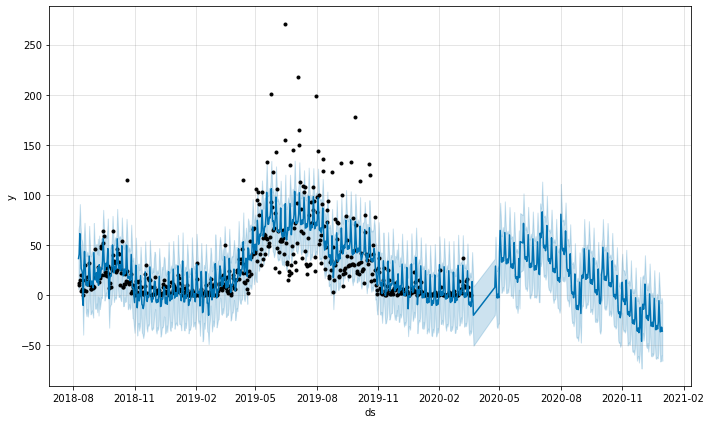

In [66]:
# Prepare the data for Prophet
northeast_core_df = northeast_core_df.rename(columns={'StartDate': 'ds', 's_Northeast Core': 'y'})

# Split the data into train and test sets
train = northeast_core_df.iloc[:int(0.7*(len(northeast_core_df)))]
test = northeast_core_df.iloc[int(0.7*(len(northeast_core_df))):]

# Instantiate a new Prophet model
m_nec = Prophet(daily_seasonality=True, yearly_seasonality=True)

#Add extra regressors to model external factors that may be influencing the trend or seasonality of the time series data.
m_nec.add_regressor('AvgTemp')
m_nec.add_regressor('Precip.(inch)')
m_nec.add_regressor('Snow(inch)')

# Fit the model to the train data
m_nec.fit(train)

# Define the number of future days to forecast
future_nec = m_nec.make_future_dataframe(periods=252)

#After we have created a Future dataset, we will need to merge regressors data back to the Future dataset before we can create a forecast.
future_nec=northeast_core_df[['ds', 'AvgTemp', 'Precip.(inch)', 'Snow(inch)']]

# Make predictions
forecast_nec = m_nec.predict(future_nec)

# Plot the forecast
m_nec.plot(forecast_nec)
plt.show()
#plot_plotly(m_nec ,forecast_nec)

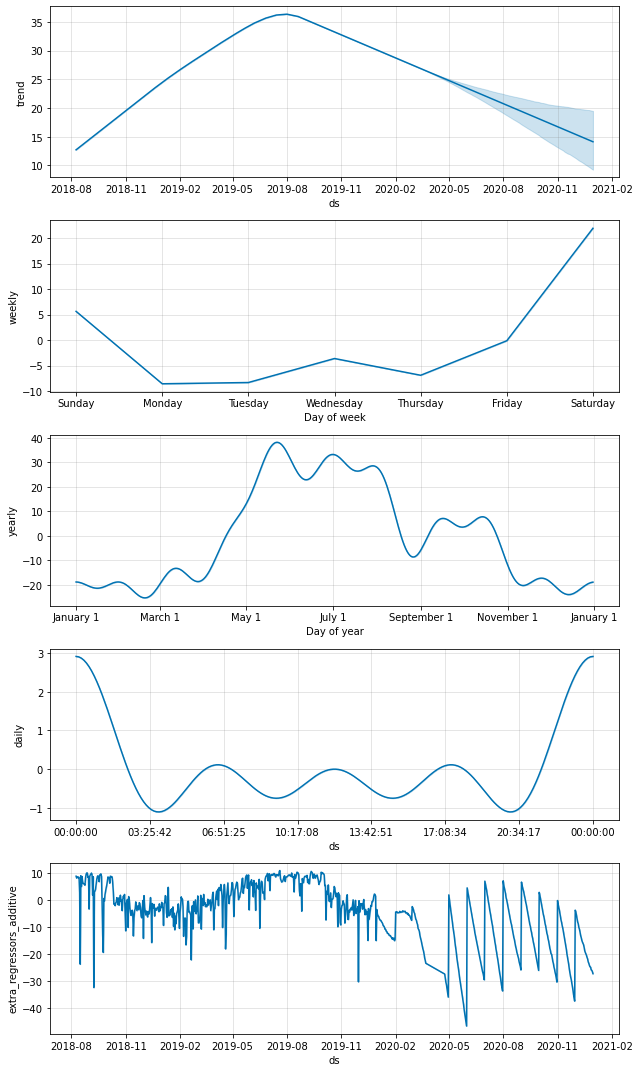

In [67]:
#plot forecast components
fig_nec = m_nec.plot_components(forecast_nec)
#plot_components_plotly(m_nec, forecast_nec)

#### Evaluate Model

In [68]:
predictions_nec = forecast_nec.iloc[-253:]['yhat']

print("Root Mean Squared Error between actual and  predicted values (RMSE): ",rmse(predictions_nec,test['y']))
print("Mean Absolute Error between actual and  predicted values (MAE): ",meanabs(predictions_nec,test['y']))
print("Mean Absolute Percentage Error between actual and  predicted values (MAPE): ",mean_absolute_percentage_error(test['y'], predictions_nec))

print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values (RMSE):  76.0758102539321
Mean Absolute Error between actual and  predicted values (MAE):  55.92448783694075
Mean Absolute Percentage Error between actual and  predicted values (MAPE):  3553959825198576.5
Mean Value of Test Dataset: 64.71541501976284


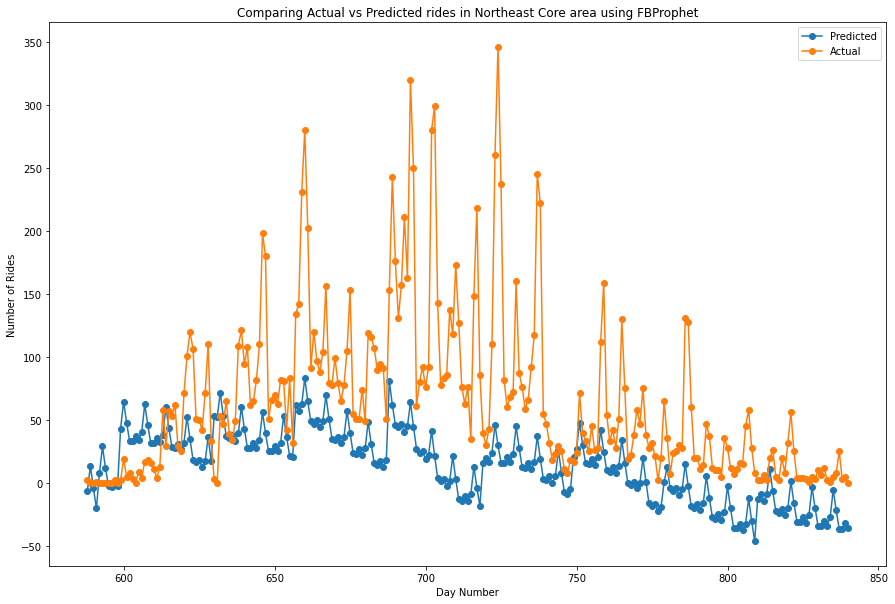

In [69]:
#Dataframe with Actual values from test set and Predicted values
nec_act_pred = pd.DataFrame({'Actual': test['y'].values, 'Predicted': predictions_nec})

# plot predictions vs actual
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides in Northeast Core area using FBProphet')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(nec_act_pred.index.values, nec_act_pred['Predicted'], '-o', label='Predicted')
plt.plot(nec_act_pred.index.values, nec_act_pred['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()

#### 5. West Core

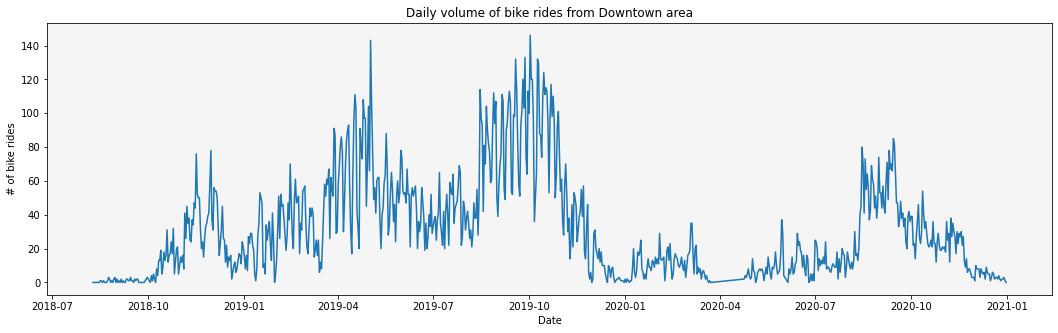

In [70]:
# plot daily ride counts for West Core neighborhood.
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(west_core_df.StartDate, 
         west_core_df['s_West Core'])
ax.set_facecolor('whitesmoke')
ax.title.set_text('Daily volume of bike rides from Downtown area')
ax.set_xlabel('Date')
ax.set_ylabel('# of bike rides');

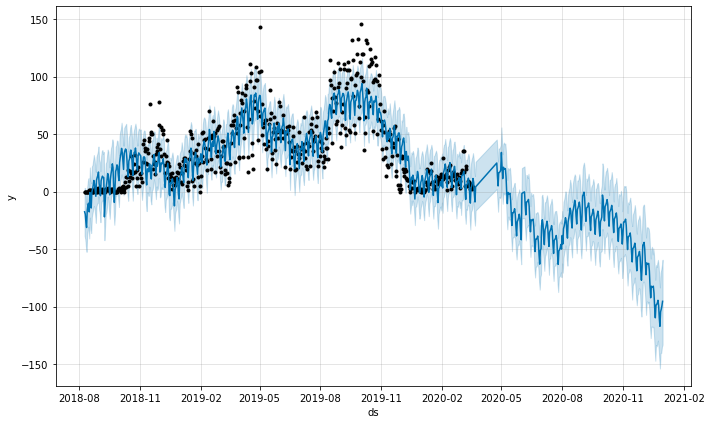

In [71]:
# Prepare the data for Prophet
west_core_df = west_core_df.rename(columns={'StartDate': 'ds', 's_West Core': 'y'})

# Split the data into train and test sets
train = west_core_df.iloc[:int(0.7*(len(west_core_df)))]
test = west_core_df.iloc[int(0.7*(len(west_core_df))):]

# Instantiate a new Prophet model
m_wcore = Prophet(daily_seasonality=True, yearly_seasonality=True)

#Add extra regressors to model external factors that may be influencing the trend or seasonality of the time series data.
m_wcore.add_regressor('AvgTemp')
m_wcore.add_regressor('Precip.(inch)')
m_wcore.add_regressor('Snow(inch)')

# Fit the model to the train data
m_wcore.fit(train)

# Define the number of future days to forecast
future_wcore = m_wcore.make_future_dataframe(periods=252)

#After we have created a Future dataset, we will need to merge regressors data back to the Future dataset before we can create a forecast.
future_wcore = west_core_df[['ds', 'AvgTemp', 'Precip.(inch)', 'Snow(inch)']]

# Make predictions
forecast_wcore = m_wcore.predict(future_wcore)

# Plot the forecast
m_wcore.plot(forecast_wcore)
plt.show()
#plot_plotly(m_wcore ,forecast_wcore)

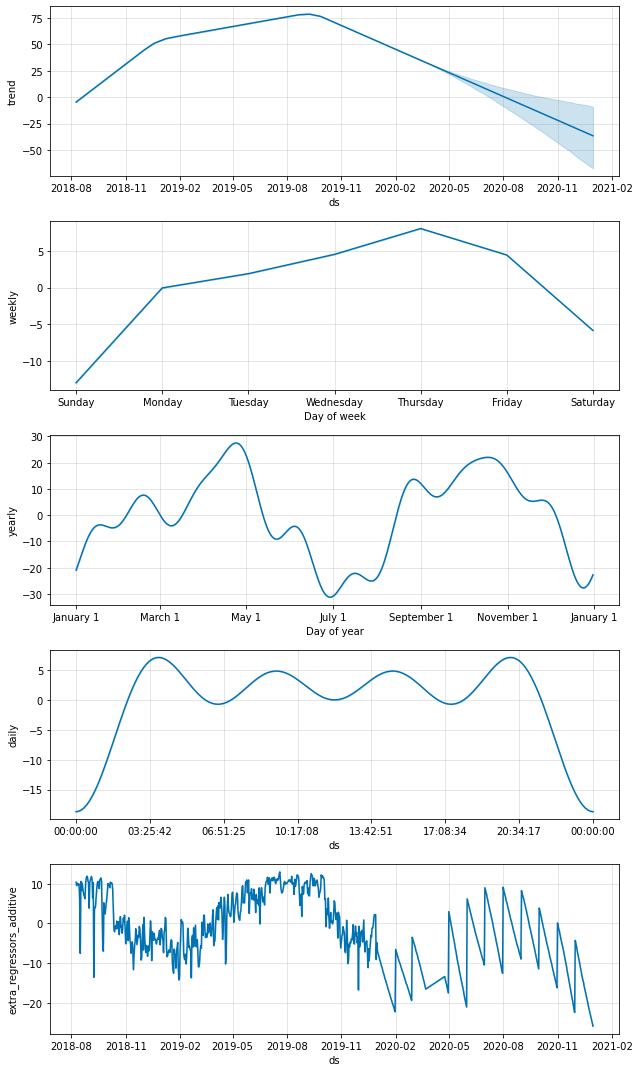

In [72]:
#plot forecast components
fig_wcore = m_wcore.plot_components(forecast_wcore)
#plot_components_plotly(m_wcore, forecast_wcore)

#### Evaluate Model

In [73]:
predictions_wcore = forecast_wcore.iloc[-253:]['yhat']

print("Root Mean Squared Error between actual and  predicted values (RMSE): ",rmse(predictions_wcore,test['y']))
print("Mean Absolute Error between actual and  predicted values (MAE): ",meanabs(predictions_wcore,test['y']))
print("Mean Absolute Percentage Error between actual and  predicted values (MAPE): ",mean_absolute_percentage_error(test['y'], predictions_wcore))

print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values (RMSE):  60.199842328294615
Mean Absolute Error between actual and  predicted values (MAE):  54.66538256373205
Mean Absolute Percentage Error between actual and  predicted values (MAPE):  2856992908539288.0
Mean Value of Test Dataset: 20.8300395256917


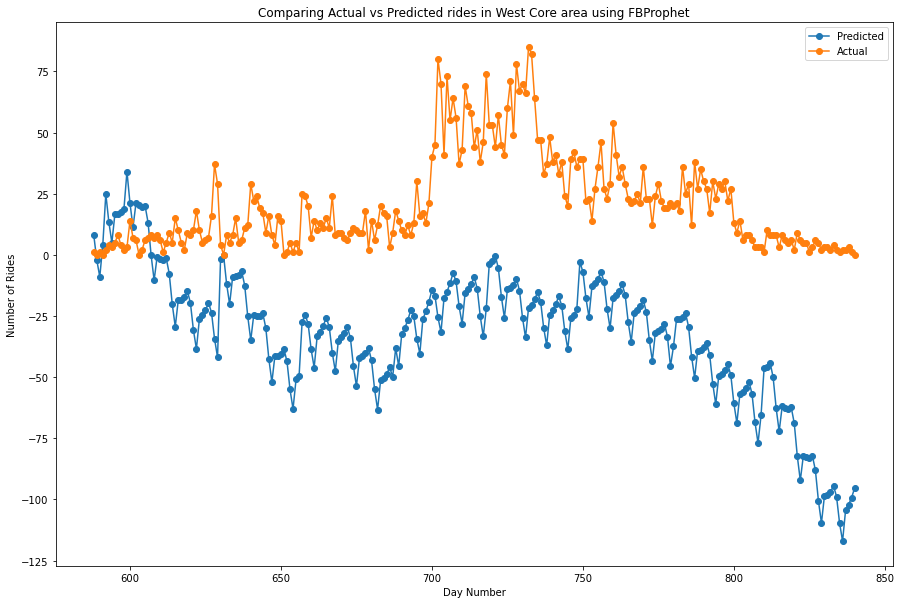

In [74]:
#Dataframe with Actual values from test set and Predicted values
wcore_act_pred = pd.DataFrame({'Actual': test['y'].values, 'Predicted': predictions_wcore})

# plot predictions vs actual
plt.figure(figsize=(15,10))
plt.title('Comparing Actual vs Predicted rides in West Core area using FBProphet')
plt.xlabel('Day Number')
plt.ylabel('Number of Rides')
plt.plot(wcore_act_pred.index.values, wcore_act_pred['Predicted'], '-o', label='Predicted')
plt.plot(wcore_act_pred.index.values, wcore_act_pred['Actual'], '-o', label='Actual')
leg = plt.legend()
plt.show()